# Set environment

In [61]:
library(tidyverse)
library(gridExtra)
library(IRdisplay)
library(latex2exp)
options(repr.plot.width = 4, repr.plot.height = 4)

# Likelihood function

Likelihood function is a function of parameters based on the observations you have in hand. The function taking the same form of joint probability distribution function (pdf) so, at the first place, it looks like an relabel of the joint pdf, while the meanings of likelihood function and joint pdf are very different.

$$L(\theta | X) = f(X | \theta)$$

# Maximum Likelihood function

# Newton method

# Examples

## Example 01 MLE and Normal distribution

## Example 02 MLE and Poisson distribution

$$f(y_i ; \theta) = \frac{\theta^{y_i} e^{-\theta}}{{y_i}!}; y_i = 0, 1, 2, 3, ...$$

$$L(\theta | y_1 ... y_n) = \prod f(y_i; \theta) = \frac{\theta^{\sum y_i} e^{-n\theta}}{y_1!y_2!...y_n!}$$

#### $$l(\theta | y_1 ... y_n) = ln(L) = \big(\sum y_i\big) ln(\theta) - n\theta - \sum\big(ln(y_i!)\big)$$

$$\frac{dl}{d\theta} = \frac{1}{\theta} \sum y_i - n$$

$$\hat{\theta}_{ML} = \frac{1}{n} \sum y_i$$

In [77]:
f_poisson <- function(y, theta){
    n      <- length(y)
    loglik <- sum(y) * log(theta) - n * theta # - sum(log(factorial(y)))
    U      <-  (1 / theta)   * sum(y) - n 
    dU     <- -(1 / theta^2) * sum(y)
    return(list(theta = theta, loglik = loglik, U = U, dU = dU))
}

In [12]:
dat <- data.frame(
    season = 1:13, 
    number = c(6, 5, 4, 6, 6, 3, 12, 7, 4, 2, 6, 7, 4))

display(dat)

season,number
1,6
2,5
3,4
4,6
5,6
6,3
7,12
8,7
9,4
10,2


### Solve analytically

In [45]:
mean(dat$number)

[1] 5.538462

In [46]:
f_poisson(dat$number, mean(dat$number))

$loglik
[1] 51.24361

$U
[1] 0

$dU
[1] -2.347222

### Solve by Newton-Raphson algorithm

In [85]:
get_next_theta <- function(res_loglik){
    theta_next <- res_loglik$theta - res_loglik$U / res_loglik$dU
    return(theta_next)
} # end func

opt_newton <- function(dat_obs, f_loglik, f_next_theta, theta0, niter){
    
    ###
    res <- NULL
    theta <- theta0
    
    ###
    for (dummy_num in 1:niter){
        
        res_loglik <- f_loglik(dat_obs, theta)
        
        res <- rbind(res, c(res_loglik$theta, res_loglik$loglik, res_loglik$U, res_loglik$dU))
        
        theta <- f_next_theta(res_loglik)
    }
    
    ###
    colnames(res) <- c("theta", "loglik", "U", "dU")
    return(res)
} # end func

In [91]:
theta0 <- 3.5
res_newton <- opt_newton(dat$number, f_poisson, get_next_theta, theta0, 10) %>% as.data.frame
display(res_newton)

theta,loglik,U,dU
3.500000,44.69893,7.571429e+00,-5.877551
4.788194,50.51652,2.036983e+00,-3.140429
5.436827,51.23133,2.430192e-01,-2.435799
5.536596,51.24360,4.379219e-03,-2.348804
5.538461,51.24361,1.474204e-06,-2.347223
5.538462,51.24361,1.669775e-13,-2.347222
5.538462,51.24361,0.000000e+00,-2.347222
5.538462,51.24361,0.000000e+00,-2.347222
5.538462,51.24361,0.000000e+00,-2.347222
5.538462,51.24361,0.000000e+00,-2.347222


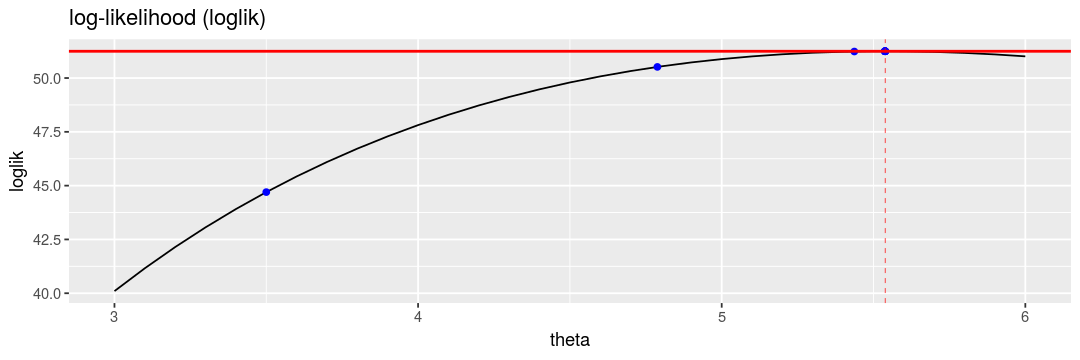

In [103]:
theta    <- seq(3, 6, by = 0.1)
df       <- f_poisson(dat$number, theta) %>% do.call(cbind, .) %>% as.data.frame

gp  <- ggplot(df)
gp <- gp + 
    ggtitle("log-likelihood (loglik)") +
    geom_line(aes(x = theta, y = loglik)) +
    geom_point(data = res_newton, aes(x = theta, y = loglik), color = "blue") + 
    geom_hline(yintercept = f_poisson(dat$number, theta_ML)$loglik, 
               color = "red", 
               size = 0.8) +
    geom_vline(xintercept = theta_ML, 
               linetype = "dashed", 
               color = "red", 
               size = 0.2)

################################################
### display the images
options(repr.plot.width = 9, repr.plot.height = 3)
print(gp)
options(repr.plot.width = 4, repr.plot.height = 4)

### Plot the results

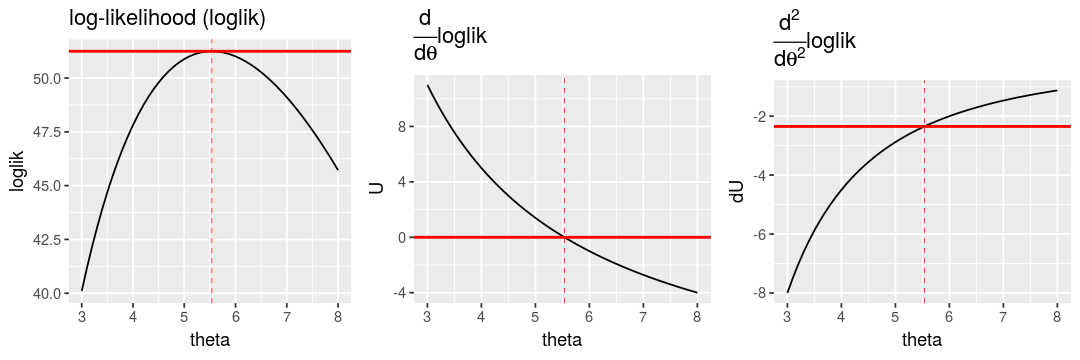

In [93]:
################################################
### intialization
theta_ML <- mean(dat$number)
theta    <- seq(3, 8, by = 0.1)
df       <- f_poisson(dat$number, theta) %>% do.call(cbind, .) %>% as.data.frame

################################################
### construct the plot
gp  <- ggplot(df)

gp1 <- gp + 
    ggtitle("log-likelihood (loglik)") +
    geom_line(aes(x = theta, y = loglik)) +
    geom_hline(yintercept = f_poisson(dat$number, theta_ML)$loglik, 
               color = "red", 
               size = 0.8) +
    geom_vline(xintercept = theta_ML, 
               linetype = "dashed", 
               color = "red", 
               size = 0.2)

gp2 <- gp + 
    ggtitle(TeX("$\\frac{d}{d\\theta}loglik$")) +
    geom_line(aes(x = theta, y = U)) + 
    geom_hline(yintercept = 0, 
               color = "red", 
               size = 0.8) +
    geom_vline(xintercept = theta_ML, 
               linetype = "dashed", 
               color = "red", 
               size = 0.2)

gp3 <- gp + 
    ggtitle(TeX("$\\frac{d^2}{d\\theta^2}loglik$")) +
    geom_line(aes(x = theta, y = dU)) +
    geom_hline(yintercept = f_poisson(dat$number, theta_ML)$dU, 
               color = "red", 
               size = 0.8) +
    geom_vline(xintercept = theta_ML, 
               linetype = "dashed", 
               color = "red", 
               size = 0.2)

################################################
### display the images
options(repr.plot.width = 9, repr.plot.height = 3)
grid.arrange(gp1, gp2, gp3, nrow = 1)
options(repr.plot.width = 4, repr.plot.height = 4)